### Quantum Teleportation

Due to the no cloning theorem, we cannot make a copy of an arbitrary qubit. But that doesn't mean that Quantum Communication
is not possible. We can use entangled qubits to teleport information from one Qubit to another.

Alice wants to send a qubit in state Psi to Bob. Psi is given by its probability amplitudes alpha and beta.

---
Done as part of the NPTEL Course - Introduction to Quantum Computing: Quantum Algorithms and Qiskit
https://onlinecourses.nptel.ac.in/noc21_cs103/preview

In [26]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state

provider = IBMQ.load_account()
print("Process Complete!")


ibmqfactory.load_account:WARNING:2021-10-17 12:49:54,010: Credentials are already in use. The existing account in the session will be replaced.


Process Complete!


In [27]:
# Setup - The Teleportation Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

teleportation_circuit = QuantumCircuit(qr, crz, crx)
print("Process Complete!")


Process Complete!


In [28]:
def create_bell_pair(qc, a, b):
    """
    EPR Pair between Qubit a and Qubit b
    """
    # Qubit a is now in state |+>
    qc.h(a)
    
    # Applying CNOT with Source: Qubit a, Destination: Qubit b
    qc.cx(a,b)
    
print("Process Complete!")

Process Complete!


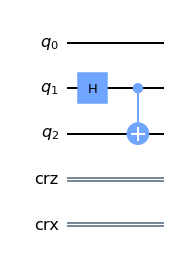

In [29]:

# A third party entangles Qubits 1 and 2
create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.draw()


In [30]:
# Now Qubits q1 and q2 part ways. Alice keeps q1 and Bob keeps q2

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    
print("Process Complete!")

Process Complete!


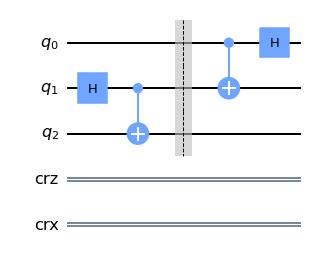

In [31]:
# Organizing the steps by placing a barrier
teleportation_circuit.barrier()

alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()


In [32]:
def measure_and_send(qc, a, b):
    """
    Measures qubits a and b and 'sends' the results to Bob
    """
    
    qc.barrier()
    # The barrier gives visual clarity and also tells the compiler not to
    # make an optimizations to the circuit
    
    qc.measure(a,0)
    qc.measure(b,1)
    
    
print("Process Complete!")    

Process Complete!


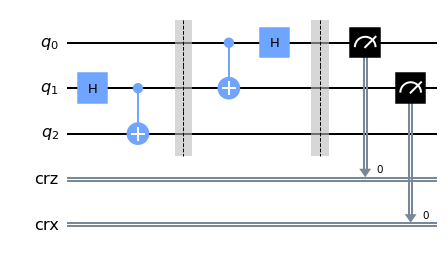

In [33]:
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

In [34]:
def bob_gates(qc, qubit, crz, crx):
    """
    Takes a quantum circuit and a qubit (integer), and the classical registers crz and crx
    which decide what gate to apply
    crz and crx get sent via a classical channel 
    (we can't get meaningful information from the teleportation without this.
    Also the reason to why Einstein's Special Theory of Relativity doesn't get violated)
    """
    
    # Applies the not gate if crx holds 1
    qc.x(qubit).c_if(crx, 1)
    
    # Applies the phase gate is crz holds 1
    qc.z(qubit).c_if(crz, 1)

print("Process Complete!")

Process Complete!


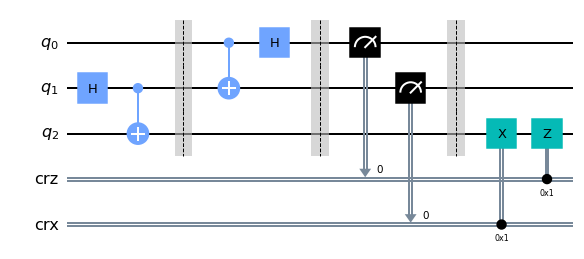

In [35]:
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


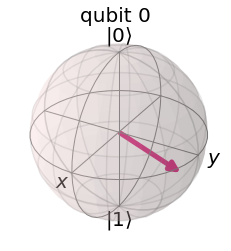

In [37]:
# To test our Protocol, we need a random state psi
psi = random_state(1)

# Displays the Qubit State vector using Latex
display(array_to_latex(psi, prefix="|\\psi\\rangle =") )

# Displays the Bloch Sphere corresponding to psi
plot_bloch_multivector(psi)


In [38]:
init_gate = Initialize(psi) # Initialize is an operator (operators aren't reversible, but gates are)
init_gate.label = "init"
print("Process Complete!")

Process Complete!


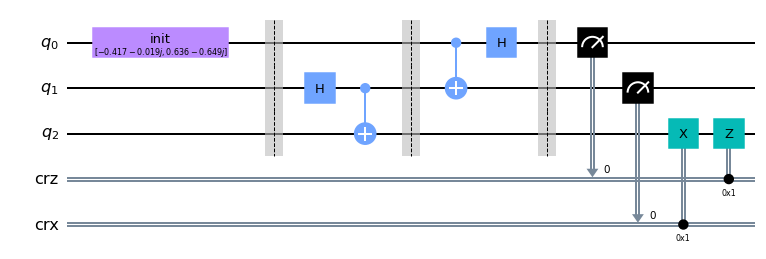

In [39]:
"""
Testing the Protocol!
"""

# SETUP
# using the statevector simulator
# Protocol implemented with 3 qubits and 2 Classical Registers
qr  = QuantumRegister(3, name="q")         
crz = ClassicalRegister(1, name="crz")     
crx = ClassicalRegister(1, name="crx")
qc  = QuantumCircuit(qr, crz, crx)


# STEP 0 - Initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# STEP 1 - Create Bell Pairs (beginning of Quantum Teleportation)
create_bell_pair(qc, 1, 2)
qc.barrier()

# STEP 2 - Send q1 to Alice and q2 to Bob
alice_gates(qc,0,1)

# STEP 3 - Alice then sends her classical registers to Bob via a Classical Channel
measure_and_send(qc, 0, 1)

# STEP 4 - Bob decodes the qubits
bob_gates(qc, 2, crz, crx)

# Display the final Quantum Circuit
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


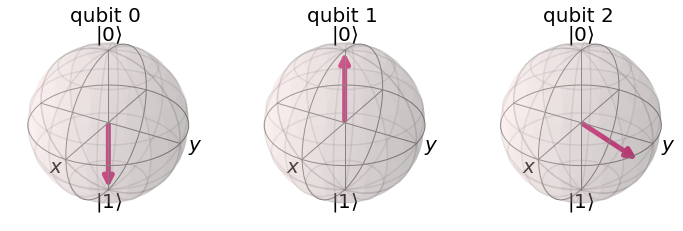

In [40]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

# Qubit 2 is the same as the Qubit generated with state psi!
# Awesome

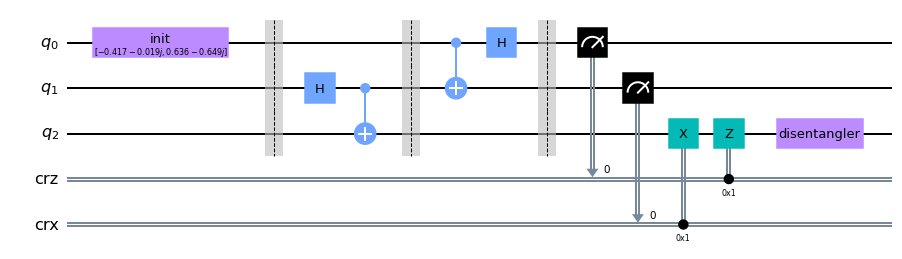

In [41]:
"""
QASM Simulation of Quantum Teleportation

Things are slightly different since we can't just 'see' the qubits during computation
or visualize them.
"""


# Performs a reset (adds a disentangler)  
inverse_init_gate = init_gate.gates_to_uncompute()


""" Redoing the protocol """
# SETUP
qr = QuantumRegister(3, name="q")

qr  = QuantumRegister(3, name="q")         
crz = ClassicalRegister(1, name="crz")     
crx = ClassicalRegister(1, name="crx")
qc  = QuantumCircuit(qr, crz, crx)


# STEP 0 - Initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# STEP 1 - Create Bell Pairs (beginning of Quantum Teleportation)
create_bell_pair(qc, 1, 2)
qc.barrier()

# STEP 2 - Send q1 to Alice and q2 to Bob
alice_gates(qc,0,1)

# STEP 3 - Alice then sends her classical registers to Bob via a Classical Channel
measure_and_send(qc, 0, 1)

# STEP 4 - Bob decodes the qubits
bob_gates(qc, 2, crz, crx)

""" 
Applying the disentangler 
The first gate on q0 is called the init gate
The last gate on q2 is the inverse init gate / disentangler
"""
qc.append(inverse_init_gate, [2])

# Display the final Quantum Circuit
qc.draw()


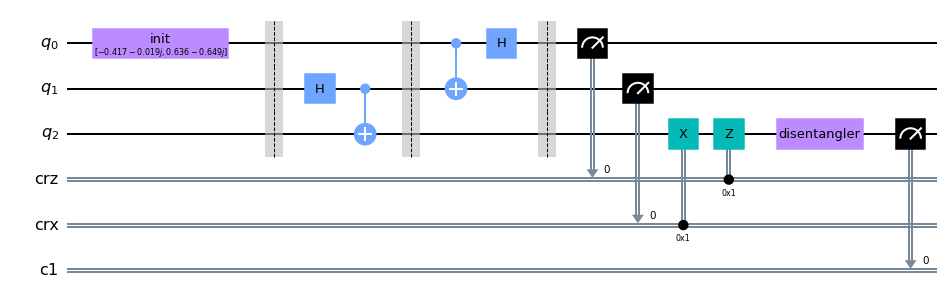

In [42]:
# Need a new Classical Register to measure q2 and store the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

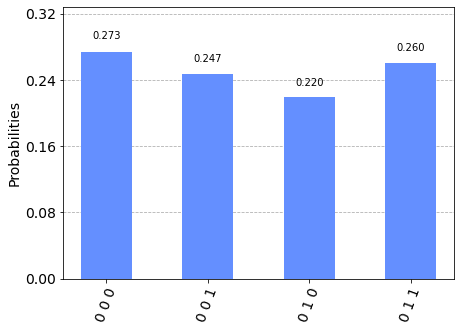

In [43]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
plot_histogram(counts)

# NOTE! The states are in reverse. So, the fourth option (011) is q2 = 0, q1 = 1, q0 = 1
# Note how all of q2 is 0 (expected result)

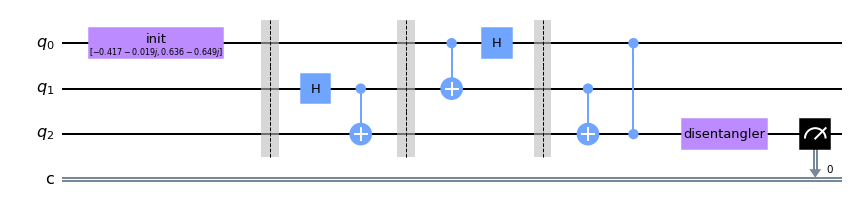

In [44]:
"""
Quantum Teleportation on IBM Hardware
On IBM's Quantum Computing hardware, we can't proceed once a measurement is made.
This is a problem since Alice has to measure qubits q0 and q1 and then pass the outputs to Bob 
so that Bob can measure q2 once the appropriate operations have been made.

To overcome this, we'll use the Deferred Measurement Principle, which states that delaying measurements until the end of the quantum computation 
doesn't affect the probability distribution of outcomes.

Measuring Qubits early - we might need to do this early on for certain circuits, so that we'll be able to reuse the circuits
after measurements.

Note that if do things this way, Alice will not be able to send the Classical information over a classical channel, which
is problematic, and renders long distance teleportation impossible.

"""

def new_bob_gates(qc, a, b, c):
    qc.cx(b,c)
    qc.cz(a,c)
    
# Initialize Alice's q0
qc = QuantumCircuit(3,1)

qc.append(init_gate, [0])
qc.barrier()

# Teleportation Protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()

# Alice sends classical bits to Bob via a Classical Channel
new_bob_gates(qc, 0,1,2)

# Undo the initialization process
qc.append(inverse_init_gate, [2])

# See the results (we only care about Bob's qubit q2)
qc.measure(2,0)
# Here we have defered the qubits q0, q1. Also, we don't need to measure them, even towards the end, since what we need is q2.

qc.draw()




ibmqfactory.load_account:WARNING:2021-10-17 13:11:50,570: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'0': 849, '1': 175}


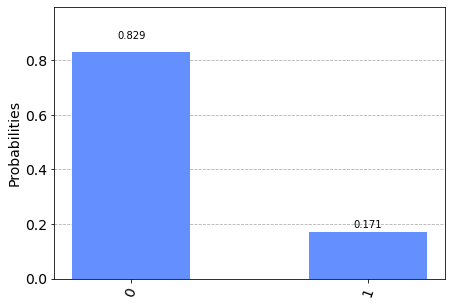

In [53]:

# Execution on IBM Hardware

# Instead of specifying the quantum computer (for example, belem), we're using the best one available for quick execution
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# We need a machine with at least 3 qubits which is not a simulator and whose operation status is True
#backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 3 and 
#                                      ( not b.configuration().simulator ) and b.status().operational==True) )


backend = provider.get_backend("ibmq_belem")

t_qc = transpile(qc, backend, optimization_level = 3)
job = backend.run(t_qc)

# Display Job Status
job_monitor(job) 

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)



# Sometimes you'll get IBMQJobFailureError if you use least_busy. Re-run the code, or use some reliable machine like ibmq_belem incase that happens



In [54]:
"""
This output makes sense since we wanted the qubit q2 to be in state |0>
q2 is not |0> 100% of the time due to noise. 
"""

print( f"Experimental Error Rate: {exp_counts['1']/sum(exp_counts.values()): .3f}" )

Experimental Error Rate:  0.171


### Question 9 Assignment 2

In the quantum teleportation protocol, let us assume Alice and Bob share the EPR pair |ψ11⟩ instead of |ψ00⟩. Let m denote the (single-bit) measurement outcome corresponding to the state |ψ⟩ that is being teleported. Let n denote the (single-bit) measurement outcome of Alice’s qubit corresponding to her part of the EPR pair. Which of the following represents the gates Bob must apply to his qubit (his part of the EPR pair) to recover the state |ψ⟩?

A) (sigmaX ^ m), (sigmaZ ^ n)

B) (sigmaX ^ n), (sigmaZ ^ (1-m) )

C) (sigmaX ^ (1-n) ), (sigmaZ ^ (1-m) )

D) (sigmaX ^ (1-n) ), (sigmaZ ^ m )



<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


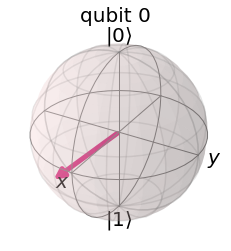

In [50]:
"""
Trying with Bell State Psi(11)
"""
# To test our Protocol, we need a random state psi
psi = random_state(1)

# Displays the Qubit State vector using Latex
display(array_to_latex(psi, prefix="|psi\\rangle =") )

# Displays the Bloch Sphere corresponding to psi
plot_bloch_multivector(psi)

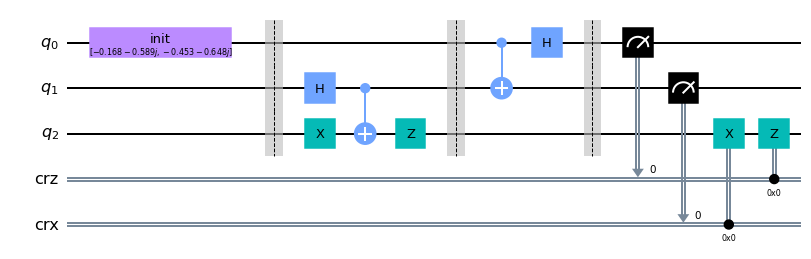

In [51]:
init_gate = Initialize(psi)
init_gate.label = "init"

"""
Testing the Protocol!
"""

def create_bell_pairNew(qc, a, b):
    """
    EPR Pair between Qubit a and Qubit b
    """
    # Qubit a is now in state |+>
    qc.h(a)
    qc.x(b)
    
    # Applying CNOT with Source: Qubit a, Destination: Qubit b
    qc.cx(a,b)
    qc.z(b)
    
def measure_and_sendNew(qc, a, b):
    """
    Measures qubits a and b and 'sends' the results to Bob
    """
    
    qc.barrier()
    # The barrier gives visual clarity and also tells the compiler not to
    # make an optimizations to the circuit
    
    qc.measure(a,0)
    qc.measure(b,1)
    
    

def alice_gatesNew(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    

# NOTE! Tweak this!
def bob_gatesNew(qc, qubit, crz, crx):
    """
    Takes a quantum circuit and a qubit (integer), and the classical registers crz and crx
    which decide what gate to apply
    crz and crx get sent via a classical channel 
    (we can't get meaningful information from the teleportation without this.
    Also the reason to why Einstein's Special Theory of Relativity doesn't get violated)
    """
    
    # Applies the not gate if crx holds 0
    qc.x(qubit).c_if(crx, 0)
    
    # Applies the phase gate is crz holds 0
    qc.z(qubit).c_if(crz, 0)
    

# SETUP
# using the statevector simulator
# Protocol implemented with 3 qubits and 2 Classical Registers
qr  = QuantumRegister(3, name="q")         
crz = ClassicalRegister(1, name="crz")     
crx = ClassicalRegister(1, name="crx")
qc  = QuantumCircuit(qr, crz, crx)


# STEP 0 - Initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# STEP 1 - Create Bell Pairs (beginning of Quantum Teleportation)
create_bell_pairNew(qc, 1, 2)
qc.barrier()

# STEP 2 - Send q1 to Alice and q2 to Bob
alice_gatesNew(qc,0,1)

# STEP 3 - Alice then sends her classical registers to Bob via a Classical Channel
measure_and_sendNew(qc, 0, 1) # ?

# STEP 4 - Bob decodes the qubits
bob_gatesNew(qc, 2, crz, crx)

# Display the final Quantum Circuit
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


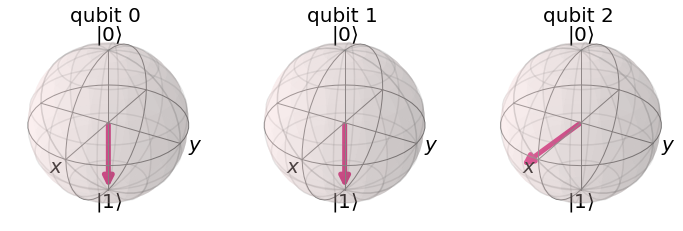

In [52]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

# Qubit 2 is the same as the Qubit generated with state psi!
# Awesome